# NLP

In [1]:
titles=open('data/title_list.txt').read().split('\n')[0:100]

titles[:15]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic',
 'Lawrence of Arabia',
 'The Godfather: Part II',
 'Psycho',
 'Sunset Blvd.',
 'Vertigo']

In [4]:
synopsis=open('data/synopses_list.txt').read().split('\n BREAKS HERE')[0:100]

synopsis[0][:200]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son,"

In [6]:
#!pip3 install spacy

In [8]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re

In [9]:
nlp=spacy.load('en')

parser=English()

In [12]:
def spacy_tokenizer(sentence):
    
    tokens=parser(sentence)
    
    filtered_tokens=[]
    for words in tokens:
        lemma=words.lemma_.lower().strip()
        
        if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$' , lemma):
            filtered_tokens.append(lemma)
            
    return filtered_tokens

In [13]:
spacy_tokenizer(synopsis[0])[:15]

['plot',
 'edit',
 'edit',
 'edit',
 'day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hears',
 'requests',
 'role',
 'godfather',
 'don',
 'new']

In [15]:
# tfidf

from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf=TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)

tfidf_matrix=tfidf.fit_transform(synopsis)

In [17]:
tfidf_matrix.shape

(100, 254)

In [22]:
import pandas as pd

pd.DataFrame(tfidf_matrix).head()

,0
0,"(0, 171)\t0.015782503757703084\n (0, 53)\t0..."
1,"(0, 171)\t0.016707243705417485\n (0, 53)\t0..."
2,"(0, 171)\t0.017879690869526076\n (0, 53)\t0..."
3,"(0, 171)\t0.012541408775298609\n (0, 53)\t0..."
4,"(0, 171)\t0.016972872543944847\n (0, 53)\t0..."


In [25]:
terms=tfidf.get_feature_names()
terms[:15]

['able',
 'agrees',
 'air',
 'american',
 'apartment',
 'army',
 'arrive',
 'arrives',
 'asks',
 'attack',
 'attempt',
 'attempts',
 'attention',
 'away',
 'battle']

In [26]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.15, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x12d6fb9e0>,
                use_idf=True, vocabulary=None)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity as cos

In [29]:
dist=1-cos(tfidf_matrix)

dist.shape

(100, 100)

In [30]:
dist

array([[-2.22044605e-16,  8.71403386e-01,  8.82700207e-01, ...,
         7.56453457e-01,  8.81292056e-01,  8.72030953e-01],
       [ 8.71403386e-01, -2.22044605e-16,  7.72031866e-01, ...,
         8.09164566e-01,  8.36998279e-01,  8.92111515e-01],
       [ 8.82700207e-01,  7.72031866e-01, -2.22044605e-16, ...,
         8.09233859e-01,  8.53123482e-01,  7.58211878e-01],
       ...,
       [ 7.56453457e-01,  8.09164566e-01,  8.09233859e-01, ...,
        -6.66133815e-16,  7.04903724e-01,  9.23311908e-01],
       [ 8.81292056e-01,  8.36998279e-01,  8.53123482e-01, ...,
         7.04903724e-01,  0.00000000e+00,  8.79640027e-01],
       [ 8.72030953e-01,  8.92111515e-01,  7.58211878e-01, ...,
         9.23311908e-01,  8.79640027e-01, -2.22044605e-16]])

In [31]:
# clusterizar

import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [32]:
umap=UMAP(n_neighbors=5, random_state=42)

emb=umap.fit_transform(dist)

emb[:5]

array([[-1.4891616 ,  4.0788736 ],
       [-1.7629136 ,  0.16342701],
       [-4.7745385 ,  2.5759263 ],
       [-0.6867237 ,  0.73427945],
       [-0.8975087 ,  2.8176866 ]], dtype=float32)

In [33]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline

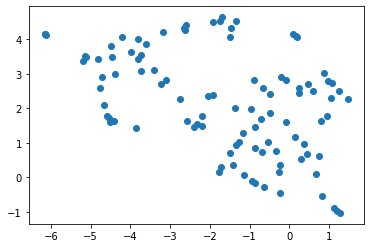

In [34]:
plt.scatter(emb[:,0], emb[:,1]);

In [35]:
import numpy as np

from hdbscan import HDBSCAN

In [36]:
hdbscan=HDBSCAN(min_cluster_size=5)

clusters=hdbscan.fit_predict(emb)

In [37]:
np.unique(clusters)

array([-1,  0,  1,  2,  3])

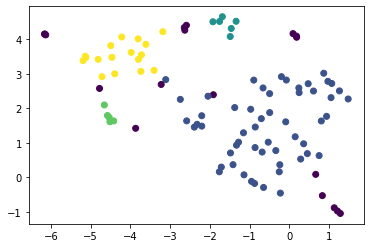

In [38]:
plt.scatter(emb[:,0], emb[:,1], c=clusters);

In [39]:
import pandas as pd

In [41]:
def get_titles_from_cluster(c):
    return pd.Series(titles)[clusters==c]

In [45]:
titles_cluster=get_titles_from_cluster(3)
titles_cluster

10                                   Lawrence of Arabia
19                                            Star Wars
24                         The Bridge on the River Kwai
29    Dr. Strangelove or: How I Learned to Stop Worr...
31                                       Apocalypse Now
33        The Lord of the Rings: The Return of the King
34                                            Gladiator
36                                  Saving Private Ryan
38                              Raiders of the Lost Ark
48                                               Patton
50                                           Braveheart
55                                              Platoon
57                                   Dances with Wolves
61                                      The Deer Hunter
62                       All Quiet on the Western Front
79                                                Shane
88                                           Stagecoach
dtype: object

In [46]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

tfidf_df.head()

,able,agrees,air,american,apartment,army,arrive,arrives,asks,attack,...,window,woman,work,working,world,wounded,year,years,york,young
0,0.0,0.064639,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053967,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.07811,0.062870,0.159100,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.074787,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.091133,0.073637,0.0,0.00000,0.133108,0.000000,0.0
2,0.0,0.073228,0.000000,0.000000,0.0,0.121965,0.000000,0.146456,0.061139,0.0,...,0.0,0.0,0.000000,0.000000,0.197012,0.0,0.00000,0.000000,0.000000,0.0
3,0.0,0.000000,0.069901,0.089895,0.0,0.085550,0.000000,0.000000,0.128654,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.06207,0.000000,0.189641,0.0
4,0.0,0.069514,0.000000,0.081106,0.0,0.077186,0.075976,0.000000,0.000000,0.0,...,0.0,0.0,0.079747,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0


In [47]:
def get_df_from_cluster(c):
    return tfidf_df[clusters==c]

In [50]:
get_df_from_cluster(2)

,able,agrees,air,american,apartment,army,arrive,arrives,asks,attack,...,window,woman,work,working,world,wounded,year,years,york,young
37,0.0,0.000000,0.0,0.000000,0.0,0.0,0.102334,0.093631,0.000000,0.000000,...,0.06371,0.000000,0.0,0.0,0.0,0.119717,0.0,0.0,0.0,0.044323
49,0.0,0.000000,0.0,0.000000,0.0,0.0,0.098682,0.000000,0.075383,0.218212,...,0.00000,0.097165,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.085481
52,0.0,0.000000,0.0,0.000000,0.0,0.0,0.080869,0.073991,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.094605,0.0,0.0,0.0,0.000000
53,0.0,0.000000,0.0,0.120766,0.0,0.0,0.113127,0.000000,0.000000,0.125078,...,0.00000,0.000000,0.0,0.0,0.0,0.132343,0.0,0.0,0.0,0.000000
56,0.0,0.077975,0.0,0.000000,0.0,0.0,0.085223,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.099698,0.0,0.0,0.0,0.000000


In [51]:
get_df_from_cluster(2).T

,37,49,52,53,56
able,0.000000,0.000000,0.000000,0.000000,0.000000
agrees,0.000000,0.000000,0.000000,0.000000,0.077975
air,0.000000,0.000000,0.000000,0.000000,0.000000
american,0.000000,0.000000,0.000000,0.120766,0.000000
apartment,0.000000,0.000000,0.000000,0.000000,0.000000
army,0.000000,0.000000,0.000000,0.000000,0.000000
arrive,0.102334,0.098682,0.080869,0.113127,0.085223
arrives,0.093631,0.000000,0.073991,0.000000,0.000000
asks,0.000000,0.075383,0.000000,0.000000,0.000000
attack,0.000000,0.218212,0.000000,0.125078,0.000000


In [56]:
top_words_cluster=get_df_from_cluster(3).T.sum(axis=1).sort_values(ascending=False)

top_words_cluster.head()

army        2.727777
general     2.264080
soldiers    2.253071
battle      2.033972
war         2.028721
dtype: float64

In [58]:
# nlp en castellano

#!python3 -m spacy download es_core_news_md

In [60]:
nlp=spacy.load('es_core_news_md')

In [62]:
doc2vec=nlp('hola me llamo Mario').vector.sum()

In [63]:
word2vec=(nlp('hola').vector+nlp('me').vector+nlp('llamo').vector+nlp('Mario').vector).sum()/4

In [64]:
print(doc2vec)
print (word2vec)

4.7413917
4.741391658782959


In [65]:
nlp('quiero saludar a todos los cabrones').similarity(nlp('quiero dar saludos'))

0.8616756440083814

In [66]:
def get_simil(t1, t2):
    return nlp(' '.join(t1)).similarity(nlp(' '.join(t2)))

In [67]:
token1=spacy_tokenizer('quiero saludar a todos')
token2=spacy_tokenizer('quiero saludar al perro')

In [68]:
get_simil(token1, token2)

0.926555616289242

# WordClouds

In [69]:
# librerias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
# !python3 -m spacy download en
from spacy.lang.es import Spanish
# !python3 -m spacy download es_core_news_md


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp=set(stopwords.words('spanish'))
stop_words_en=set(stopwords.words('english'))
stop_words=stop_words_sp | stop_words_en


import re

from langdetect import detect

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /Users/data/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def tokenizer(txt):  # texto
    
    if detect(txt)=='en':    # si el texto esta en ingles...
        nlp=spacy.load('en')
        parser=English()
        
    elif detect(txt)=='es':   # si el texto esta en castellano...
        nlp=spacy.load('es_core_news_md')
        parser=Spanish()
        
    else:
        return 'No es castellano ni ingles.'
    
    tokens=parser(txt)
    
    filtered_tokens=[]
    
    for word in tokens:
        lemma=word.lemma_.lower().strip()
        if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
            filtered_tokens.append(lemma)
    
    return ' '.join(filtered_tokens)

In [71]:
def wordcloud(df,col): # dataframe, columna
    
    wordcloud=WordCloud(width=1600, height=400, stopwords=stop_words).generate(' '.join([e for e in df[col]]))

    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('data/wordcloud.png', facecolor='k', bbox_inches='tight')
    plt.show()

In [72]:
# se carga un texto
txt=open('data/synopses_list.txt').read().split('\n BREAKS HERE')[0:100]

In [73]:
# se convierte en dataframe y se tokeniza
df=pd.DataFrame(txt, columns=['text'])
df['text']=df['text'].apply(tokenizer)

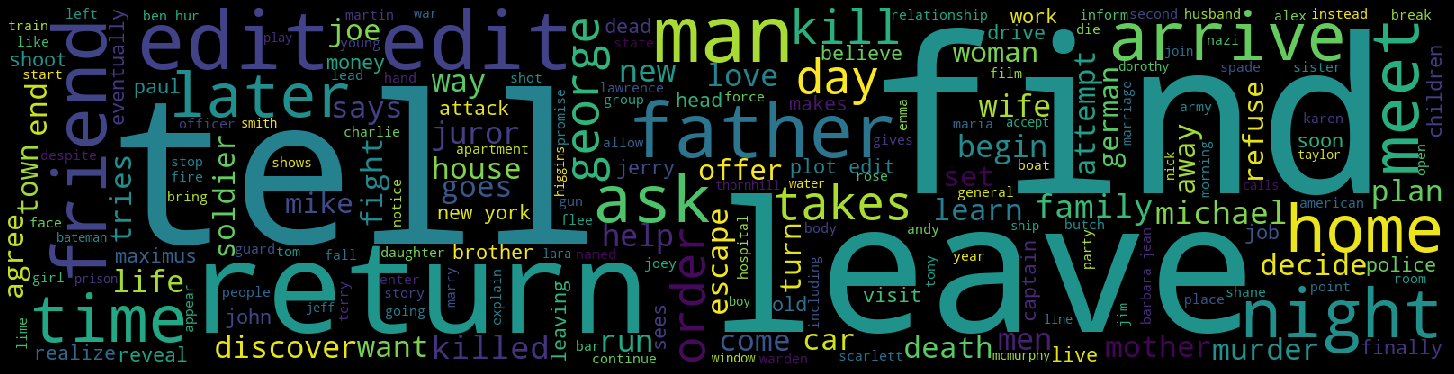

In [74]:
# wordcloud
wordcloud(df, 'text')

In [75]:
# se carga un texto
txt2=open('data/conde.txt').read().split('\n BREAKS HERE')[0:100]

In [76]:
# se convierte en dataframe y se tokeniza
df2=pd.DataFrame(txt2, columns=['text'])
df2['text']=df2['text'].apply(tokenizer)

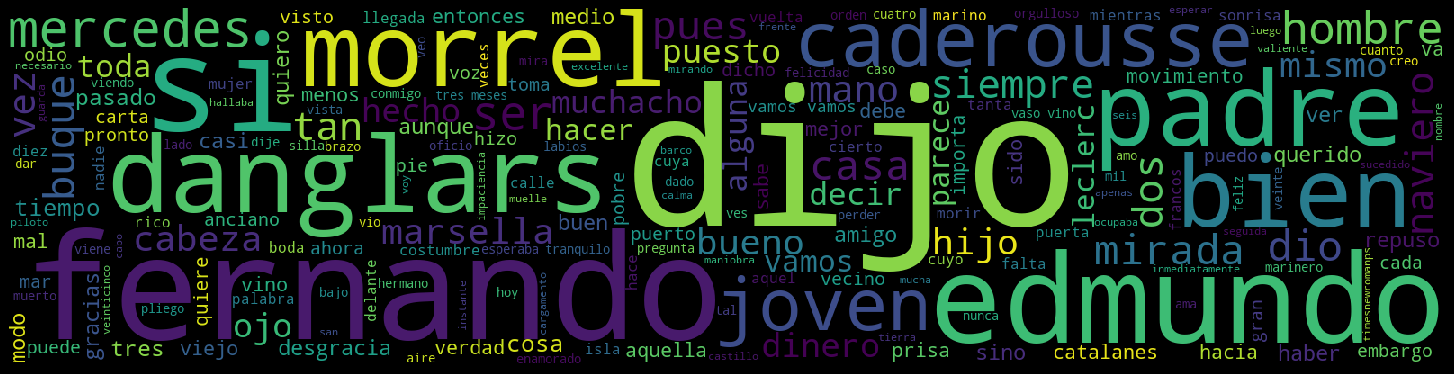

In [78]:
# wordcloud
wordcloud(df2, 'text')

In [79]:
# imagen mascara

vino_mask=np.array(Image.open('data/vino.png'))

In [80]:
# transformacion de la mascara

def transform(val):
    if val==0:
        return 255
    else:
        return val
    
t_vino_mask=np.ndarray((vino_mask.shape[0],vino_mask.shape[1]), np.int32)

for i in range(len(vino_mask)):
    t_vino_mask[i]=list(map(transform, vino_mask[i]))

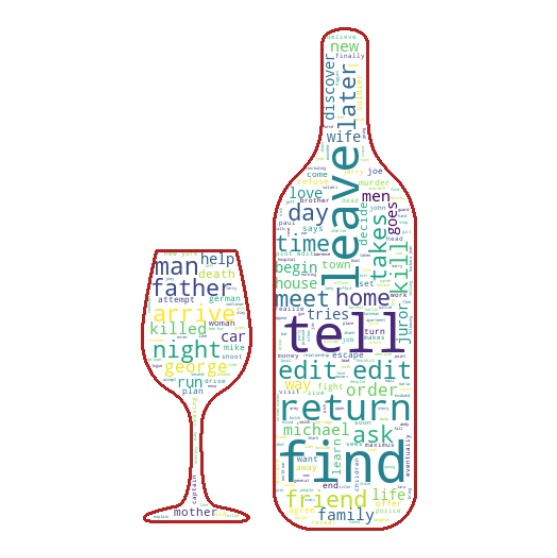

In [81]:
# Generacion wordcloud

w=WordCloud(background_color='white', 
            max_words=1000, 
            mask=t_vino_mask,
            stopwords=stop_words, 
            contour_width=3, 
            contour_color='firebrick').generate(' '.join([e for e in df.text]))

                                                          # guardado y ploteo
w.to_file('data/copa&botella.png')

plt.figure(figsize=[20,10])
plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
def tokenizer(lst):  # ahora entra una lista
    
    en=0
    es=0
    
    for txt in lst:
        try:
            txt=str(txt)
            if detect(txt)=='en':    # si el texto esta en ingles...
                en+=1
                
                nlp=spacy.load('en')
                parser=English()
                tokens=parser(txt)

                tokens_en=[]

                for word in tokens:
                    lemma=word.lemma_.lower().strip()
                    if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
                        tokens_en.append(lemma)

            elif detect(txt)=='es':   # si el texto esta en castellano...
                es+=1
                
                nlp=spacy.load('es_core_news_md')
                parser=Spanish()
                tokens=parser(txt)

                tokens_es=[]

                for word in tokens:
                    lemma=word.lemma_.lower().strip()
                    if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
                        tokens_es.append(lemma)

            else:
                print ('No se reconoce idioma (EN / ES)...')
        
        except:
            print ('ERROR...')
            continue
    
    
    return ' '.join(tokens_en), ' '.join(tokens_es), en, es

In [83]:
# texto con los dos idiomas

mix_text=txt+txt2

tokens=tokenizer(mix_text)

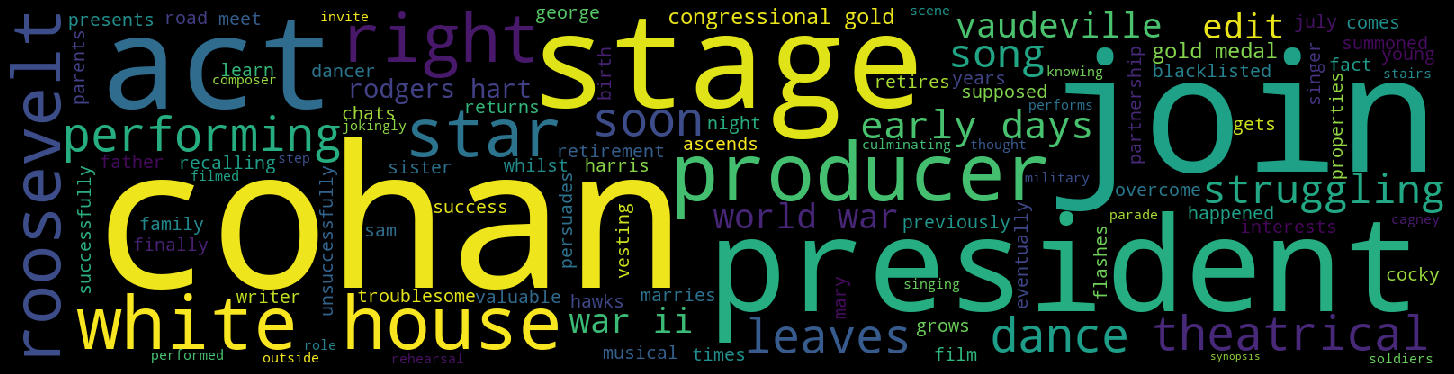

In [96]:
# wordcloud ingles

serie_en=pd.DataFrame({'en':tokens[0]}, index=[0])

wordcloud(serie_en, 'en')

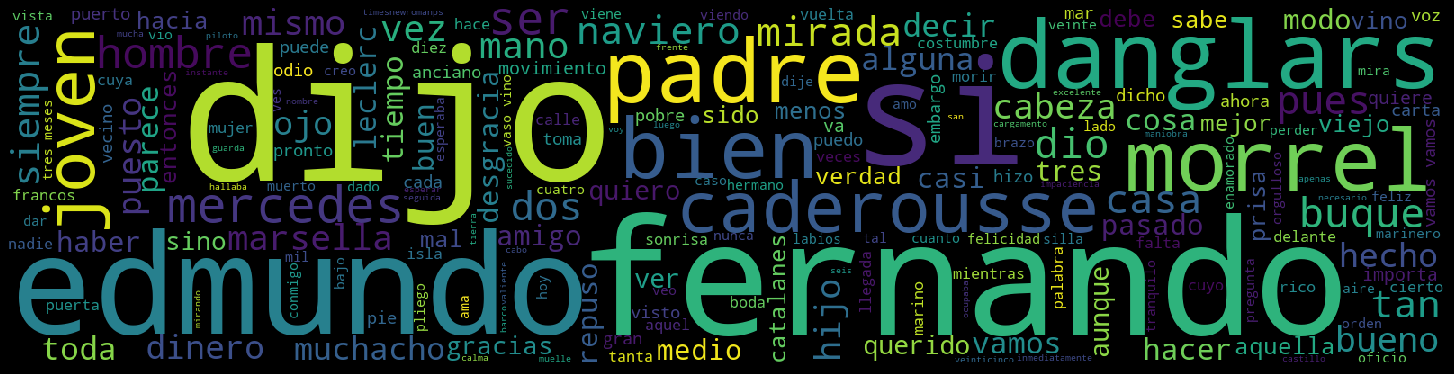

In [97]:
# wordcloud castellano

serie_es=pd.DataFrame({'es':tokens[1]}, index=[0])

wordcloud(serie_es, 'es')